In [10]:
import ctypes
import logging
import multiprocessing as mp

from contextlib import closing
import numpy as np
from datetime import datetime
import os
import cv2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [6]:
info = mp.get_logger().info

In [11]:
from scipy.misc import imread, imsave
from sklearn.externals.joblib import Parallel, delayed
from PIL import Image
from skimage import img_as_float
import multiprocess as mp
import cv2

def process_images(image_paths_list):
    
    model = VGG16(weights='imagenet', include_top=False)
    
    images = Parallel(n_jobs=6, verbose=5)(
        delayed(Image.open)(f) for f in image_paths_list
    )   

    new_images = []
    def resize_process(task_info):
        im = task_info
        im_resized = im.resize((224, 224), Image.ANTIALIAS) 
        im_arr = np.expand_dims(im_resized, axis=0) # add one dimension as 1
        im_arr.flags.writeable = True
        im_arr = im_arr.astype(np.float64)
        return im_arr
    
    def resize_organizer():
        task_list = []
        for im in images:
            task_list.append(im)
        p = mp.Pool(mp.cpu_count())
        new_images = p.map(resize_process, task_list)
        return new_images

#     images = Parallel(n_jobs=6, verbose=5)(
#         delayed(img_as_float)(f) for f in images
#     )
    
#     task_list2 = []
#     features = []
#     def predict_process(task_info):
#         im = task_info
#         features.append(model.predict(im))
        
#     p = mp.Pool(mp.cpu_count())
#     features = p.map(predict_process(), images)
    new_images = resize_organizer()
    return new_images

In [6]:
image_paths_list = []
for i in range(1000):
    path = os.getcwd() + '/datasets/frames/video' + str(i)
    if not os.path.exists(path): continue
    image_paths_list.extend([path + \
                             '/frame' +str(idx)+'.jpg' for idx in range(1, 11, 1)])
image_paths_list[:10]

['/home/sunjiajun/cs231n_project/datasets/frames/video0/frame1.jpg',
 '/home/sunjiajun/cs231n_project/datasets/frames/video0/frame2.jpg',
 '/home/sunjiajun/cs231n_project/datasets/frames/video0/frame3.jpg',
 '/home/sunjiajun/cs231n_project/datasets/frames/video0/frame4.jpg',
 '/home/sunjiajun/cs231n_project/datasets/frames/video0/frame5.jpg',
 '/home/sunjiajun/cs231n_project/datasets/frames/video0/frame6.jpg',
 '/home/sunjiajun/cs231n_project/datasets/frames/video0/frame7.jpg',
 '/home/sunjiajun/cs231n_project/datasets/frames/video0/frame8.jpg',
 '/home/sunjiajun/cs231n_project/datasets/frames/video0/frame9.jpg',
 '/home/sunjiajun/cs231n_project/datasets/frames/video0/frame10.jpg']

In [12]:
im = process_images(image_paths_list[:800])

ImportError: [joblib] Attempting to do parallel computing without protecting your import on a system that does not support forking. To use parallel-computing in a script, you must protect your main loop using "if __name__ == '__main__'". Please see the joblib documentation on Parallel for more information

In [37]:
import cv2
import numpy as np
import os
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


%load_ext autoreload
%autoreload 2
%matplotlib inline


video_ind = 55
num_frames = 10

video_path = './datasets/frames/video'+str(video_ind)
frame1_path = video_path+'/frame1.jpg'
frame1 = Image.open(frame1_path)
frame1 = np.asarray(frame1 )

prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
print(type(frame1),frame1.shape,type(prvs), prvs.shape)



for i in range(2, num_frames+1):
    frame_path = video_path+'/frame'+str(i)+'.jpg'
    frame2 = Image.open(frame_path)
    frame2 = np.asarray(frame2)
    
    nexts = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    
    flow = cv2.calcOpticalFlowFarneback(prvs,nexts, None, 0.5, 3, 15, 3, 5, 1, 0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
   
    cv2.imwrite('./datasets/optical_flow_example/opticalfb'+str(i)+'.png',frame2)
    cv2.imwrite('./datasets/optical_flow_example/opticalhsv'+str(i)+'.png',bgr)
    prvs = nexts



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<class 'numpy.ndarray'> (360, 640, 3) <class 'numpy.ndarray'> (360, 640)


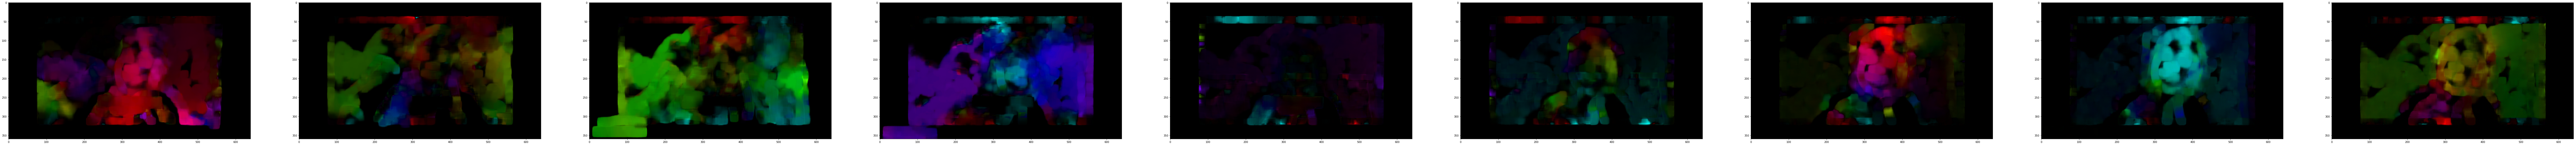

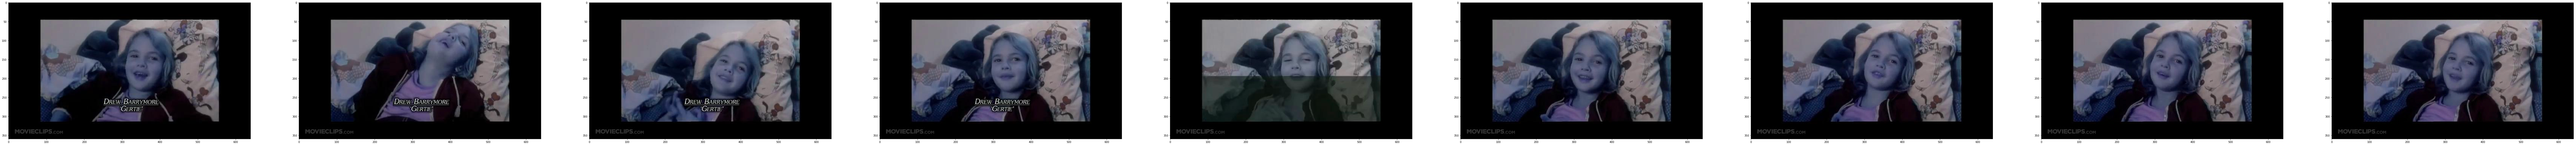

In [38]:
video_ind = 55
num_frames = 10

plt.figure(figsize=(200,60))
for i in range(2, num_frames+1):
    plt.subplot(2, num_frames, i)
    frame_path = './datasets/optical_flow_example/opticalhsv'+str(i)+'.png'
    frame = Image.open(frame_path)
    plt.imshow(frame)

plt.figure(figsize=(200,60))
for i in range(2, num_frames+1):
    plt.subplot(1, num_frames, i)
    frame_path = './datasets/optical_flow_example/opticalfb'+str(i)+'.png'
    frame = Image.open(frame_path)
    plt.imshow(frame)
    
    